## Task 7: Create box-plots of the petal lengths for each of the three classes.

Tasks based on instructions given in document https://github.com/ianmcloughlin/principles_of_data_analytics/blob/main/assessment/tasks.md

***
This task looks at the BoxPlot visualization.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Michelsonmorley-boxplot.svg/330px-Michelsonmorley-boxplot.svg.png)

https://en.wikipedia.org/wiki/Box_plot
I will use the boxplot() from matplotlib
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

In this task I will explore ...
* how to filter data in pandas dataframe object by species
* a basic boxplot visualization
* a boxplot with additional features and formatting
* Superimposing a feature's histogram onto a boxplot's visualization
* how to have 2 graph's sharing same x axis but different y axis
* display a full grid of iris feature boxplots and histgrams

***

Lets get some code to look at petal lengths in each of species of Iris  
Firstly look at head of dataset ...

In [14]:
#import required modules 
import numpy as np
from sklearn import datasets as ds
import pandas as pd
import matplotlib.pyplot as plt

#load the Iris Dataset and convert to a dataframe
ds_iris = ds.load_iris()
# Convert the data to a pandas DataFrame
df_iris = pd.DataFrame(ds_iris.data, columns=ds_iris.feature_names)
print(df_iris.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Lets extract the petal length data ...

In [3]:
df_iris['petal length (cm)']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64

Apply a filter on 3 species and create list of 3 separate data arrays...  
The pandas dataframe does not have a 'species' column (that we can apply a filter to)  
So, we add this column and the filter this to extract our specific species

In [32]:
# Add the target column (species) to the DataFrame
df_iris['species'] = ds_iris.target

#list of Species names
petal_length_label = ds_iris.target_names 

#Apply a "splicing filter" to dataframe to extract required data for Setosa, Versicolor, and Virginica
#Add each filtered group to a list collection (and a list of target_names)
petal_length_data = [] #List of 3 arrays of petal lengths (for each species)
for iris_species in range(len(petal_length_label)):
    petal_length_data.append(df_iris[df_iris['species'] == iris_species]['petal length (cm)'])



Create the **basic** plot of boxplots ...

C:\Users\Niall\AppData\Local\Temp\ipykernel_14992\3418281741.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(petal_length_data, labels=petal_length_label)


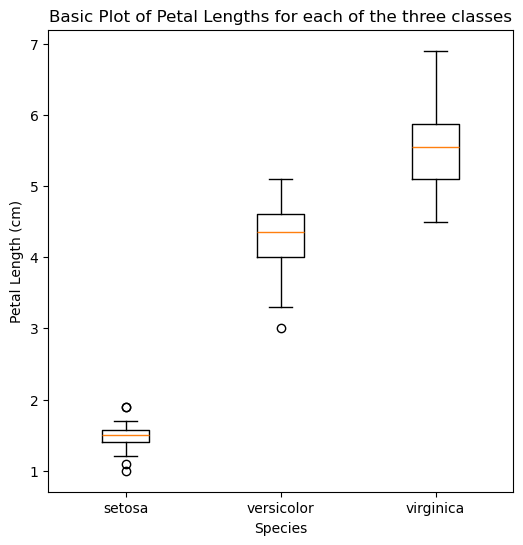

In [66]:
# Create the boxplot using Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
bp = ax.boxplot(petal_length_data, labels=petal_length_label)

# Add labels and title
ax.set_title('Basic Plot of Petal Lengths for each of the three classes')
ax.set_xlabel('Species')
ax.set_ylabel('Petal Length (cm)')

# Show the plot
plt.show()

Add additional plot formatting features ...
* Fill boxes with color
* Bold Title
* Add a "Mean" line (alongside the Median)
* Hide the Outlier data (circles)

C:\Users\Niall\AppData\Local\Temp\ipykernel_14992\2795501801.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(petal_length_data, labels=petal_length_label, patch_artist=True, showmeans=True, meanline=True, showfliers=False)


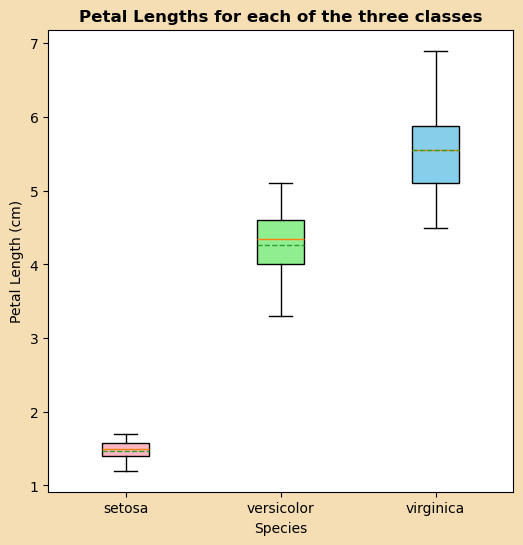

In [106]:
# Create the boxplot using Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
bp = ax.boxplot(petal_length_data, labels=petal_length_label, patch_artist=True, showmeans=True, meanline=True, showfliers=False)

#Add fill colors to each boxplot
colors = ['lightpink', 'lightgreen', 'skyblue']  # Color for Setosa, Versicolor, and Virginica
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)  # Set the fill color

# Add labels and title
ax.set_title('Petal Lengths for each of the three classes', fontweight='bold')
ax.set_xlabel('Species')
ax.set_ylabel('Petal Length (cm)')

# Show the plot
fig.set_facecolor('wheat')
plt.show()

Separating the 3 Species aside, It would be intersting to plot the boxplot horizontally and superimpose the histogram distribution graph on same figure ...

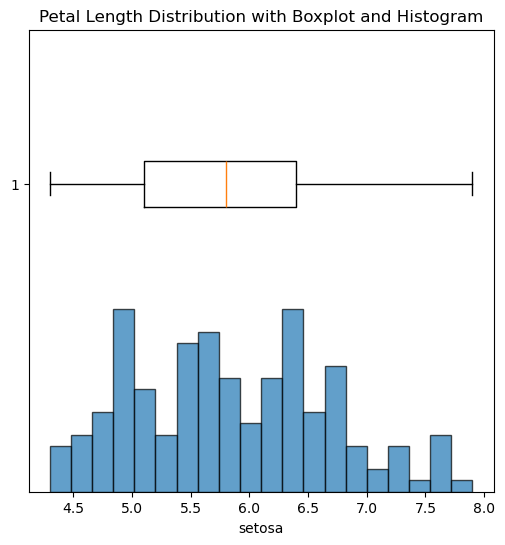

In [81]:

# Create a figure with 2 subplots (1 row, 2 columns)
# Create a figure with a single plot
plt.figure(figsize=(6, 6))
feature_index = 0
feature_data = ds_iris.data[:, feature_index]
# Plot histogram
plt.hist(feature_data, bins=20, edgecolor='black', alpha=0.7, density=True)

# Plot boxplot (horizontally)
plt.boxplot(feature_data, vert=False)

# Add labels and title
plt.title('Petal Length Distribution with Boxplot and Histogram')
plt.xlabel(ds_iris.target_names[feature_index])
#plt.ylabel('Density / Frequency')

# Show the plot
plt.show()

**I did not like above plot**. I would like separate Y Axis to be set for Boxplot/Histogram.  
Can the 2 plots have separate axises on left-hand and right-hand Y axis ... ? 

Lets use the $twinx()$ method that allows 2 plots to share same X axis, but Y axis will use left or right-hand Y axis

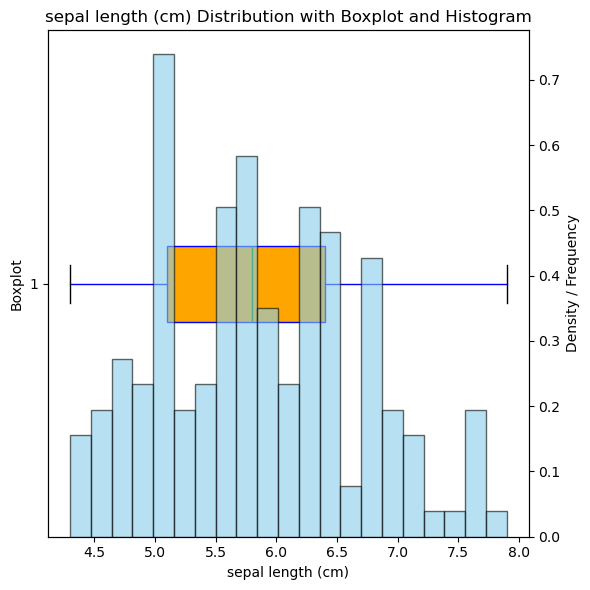

In [ ]:
# Create a figure
fig, ax1 = plt.subplots(figsize=(6, 6))
feature_index = 0 #lets iterate thru 4 features in next attempt for a final full plot
feature_data = ds_iris.data[:, feature_index]
feature_name = ds_iris.feature_names[feature_index]

# Plot the boxplot on the left axis (ax1)
ax1.boxplot(feature_data, vert=False, patch_artist=True, boxprops=dict(facecolor='orange', color='blue'),
            whiskerprops=dict(color='blue'), flierprops=dict(markerfacecolor='red', marker='o', markersize=6),
            medianprops=dict(color='green'))
ax1.set_title(f'{feature_name} Distribution with Boxplot and Histogram')
ax1.set_xlabel(feature_name)
ax1.set_ylabel('Boxplot')

# Create a second y-axis (ax2) for the histogram
ax2 = ax1.twinx()  # Create a second axis that shares the same x-axis
ax2.hist(feature_data, bins=21, color='skyblue', edgecolor='black', alpha=0.6, density=True)
ax2.set_ylabel('Density / Frequency')

# Show the plot
plt.tight_layout()
plt.show()

Display this for each of the 4 Iris Features
* Sepal Width
* Sepal Length
* Petal Width
* Petal Length

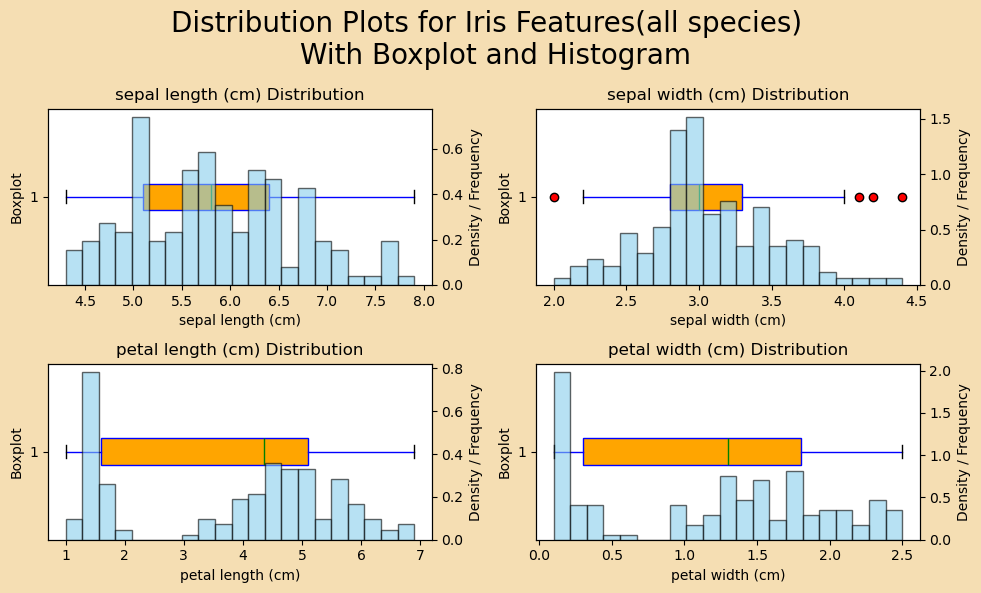

In [164]:
# Create a figure with 2x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))


for i in range(2):
    for j in range(2):
        #specify grid position
        ax1 = axes[i, j]

        feature_index = j + (i * 2) #lets iterate thru 4 features in next attempt for a final full plot
        feature_data = ds_iris.data[:, feature_index]
        feature_name = ds_iris.feature_names[feature_index]

        # Plot the boxplot on the left axis (ax1)
        ax1.boxplot(feature_data, vert=False, patch_artist=True, boxprops=dict(facecolor='orange', color='blue'),
            whiskerprops=dict(color='blue'), flierprops=dict(markerfacecolor='red', marker='o', markersize=6),
            medianprops=dict(color='green'))
        ax1.set_title(f'{feature_name} Distribution')
        ax1.set_xlabel(feature_name)
        ax1.set_ylabel('Boxplot')

        # Create a second y-axis (ax2) for the histogram
        ax2 = ax1.twinx()  # Create a second axis that shares the same x-axis
        ax2.hist(feature_data, bins=21, color='skyblue', edgecolor='black', alpha=0.6, density=True)
        ax2.set_ylabel('Density / Frequency')

# Show the plot
fig.set_facecolor('wheat')
fig.suptitle('Distribution Plots for Iris Features(all species)  \nWith Boxplot and Histogram', fontsize=20)
plt.tight_layout()
plt.show()

The Histograms for petal length/width highlight clustered regions of data.  
*So we need to look the Iris species classification once again ...*

Lets now create a 2x2 grid of plots of all 4 features for each of 3 species.   
i.e. 3 plots of 2x2 subplots

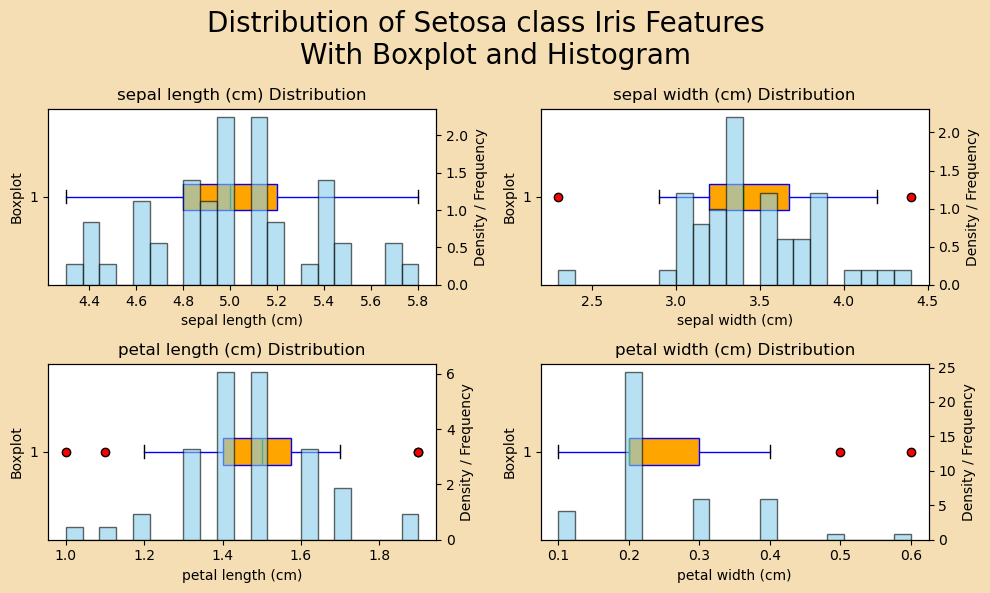

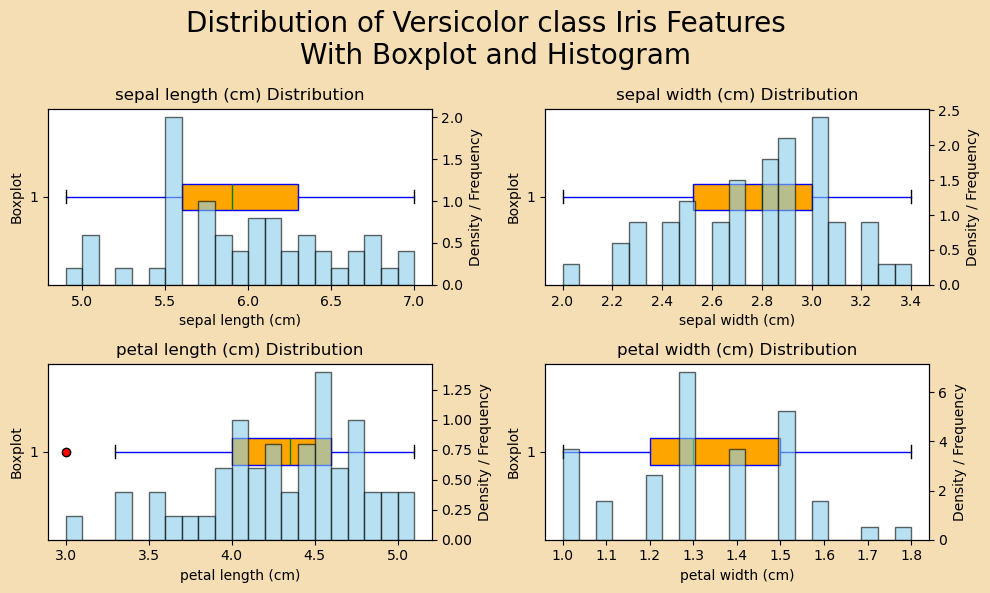

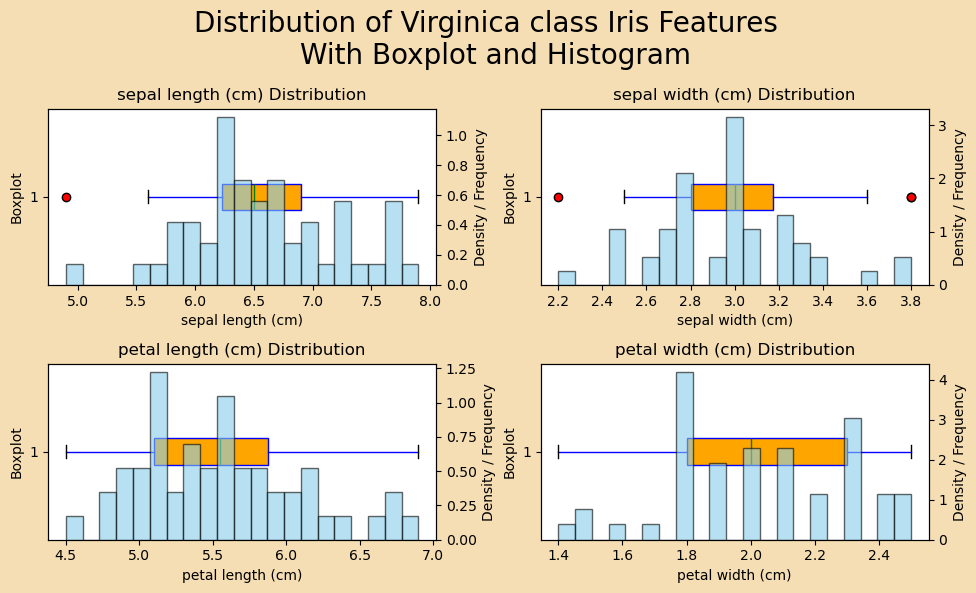

In [ ]:
for ispecies in range(3):
    # Create a figure with 2x2 grid of plots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
    species_name = ds_iris.target_names[ispecies]

    for i in range(2):
        for j in range(2):
            #specify grid position
            ax1 = axes[i, j]
            feature_index = j + (i * 2) #iterate thru 4 features 
            feature_name = ds_iris.feature_names[feature_index]

            #Filter the data ... very very awkward to get this syntax correct !!
            feature_data = df_iris[df_iris['species'] == ispecies][feature_name]

            # Plot the boxplot on the left axis (ax1)
            ax1.boxplot(feature_data, vert=False, patch_artist=True, boxprops=dict(facecolor='orange', color='blue'),
                whiskerprops=dict(color='blue'), flierprops=dict(markerfacecolor='red', marker='o', markersize=6),
                medianprops=dict(color='green'))
            ax1.set_title(f'{feature_name} Distribution')
            ax1.set_xlabel(feature_name)
            ax1.set_ylabel('Boxplot')

            # Create a second y-axis (ax2) for the histogram
            ax2 = ax1.twinx()  # Create a second axis that shares the same x-axis
            ax2.hist(feature_data, bins=21, color='skyblue', edgecolor='black', alpha=0.6, density=True)
            ax2.set_ylabel('Density / Frequency')

    # Show the plot
    fig.set_facecolor('wheat')
    fig.suptitle(f'Distribution of {species_name.capitalize()} class Iris Features  \nWith Boxplot and Histogram', fontsize=20)
    plt.tight_layout()
    plt.show()

***
## Conclusion:

TODO: